# Hands On Oem-Oem Data Science: Churn Analysis

### Isi ___ dengan kode yang sesuai

In [557]:
#Memuat data pada notebook
import pandas as pd

data = pd.read_csv("/kaggle/input/oemoem-dsai/data_ecommerce_customer_churn.csv")

## Analisa Data Secara Keseluruhan (EDA)


<div align="center">
    <img src="https://ppcexpo.com/blog/wp-content/uploads/2022/01/exploratory-data-analysis.jpg" width="700" height="400"/>
</div>

### Visualisasi dan Memahami Data

In [558]:
# Prints the first 5 rows of the dataframe
data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [559]:
# Prints the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


#### Distribution Plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

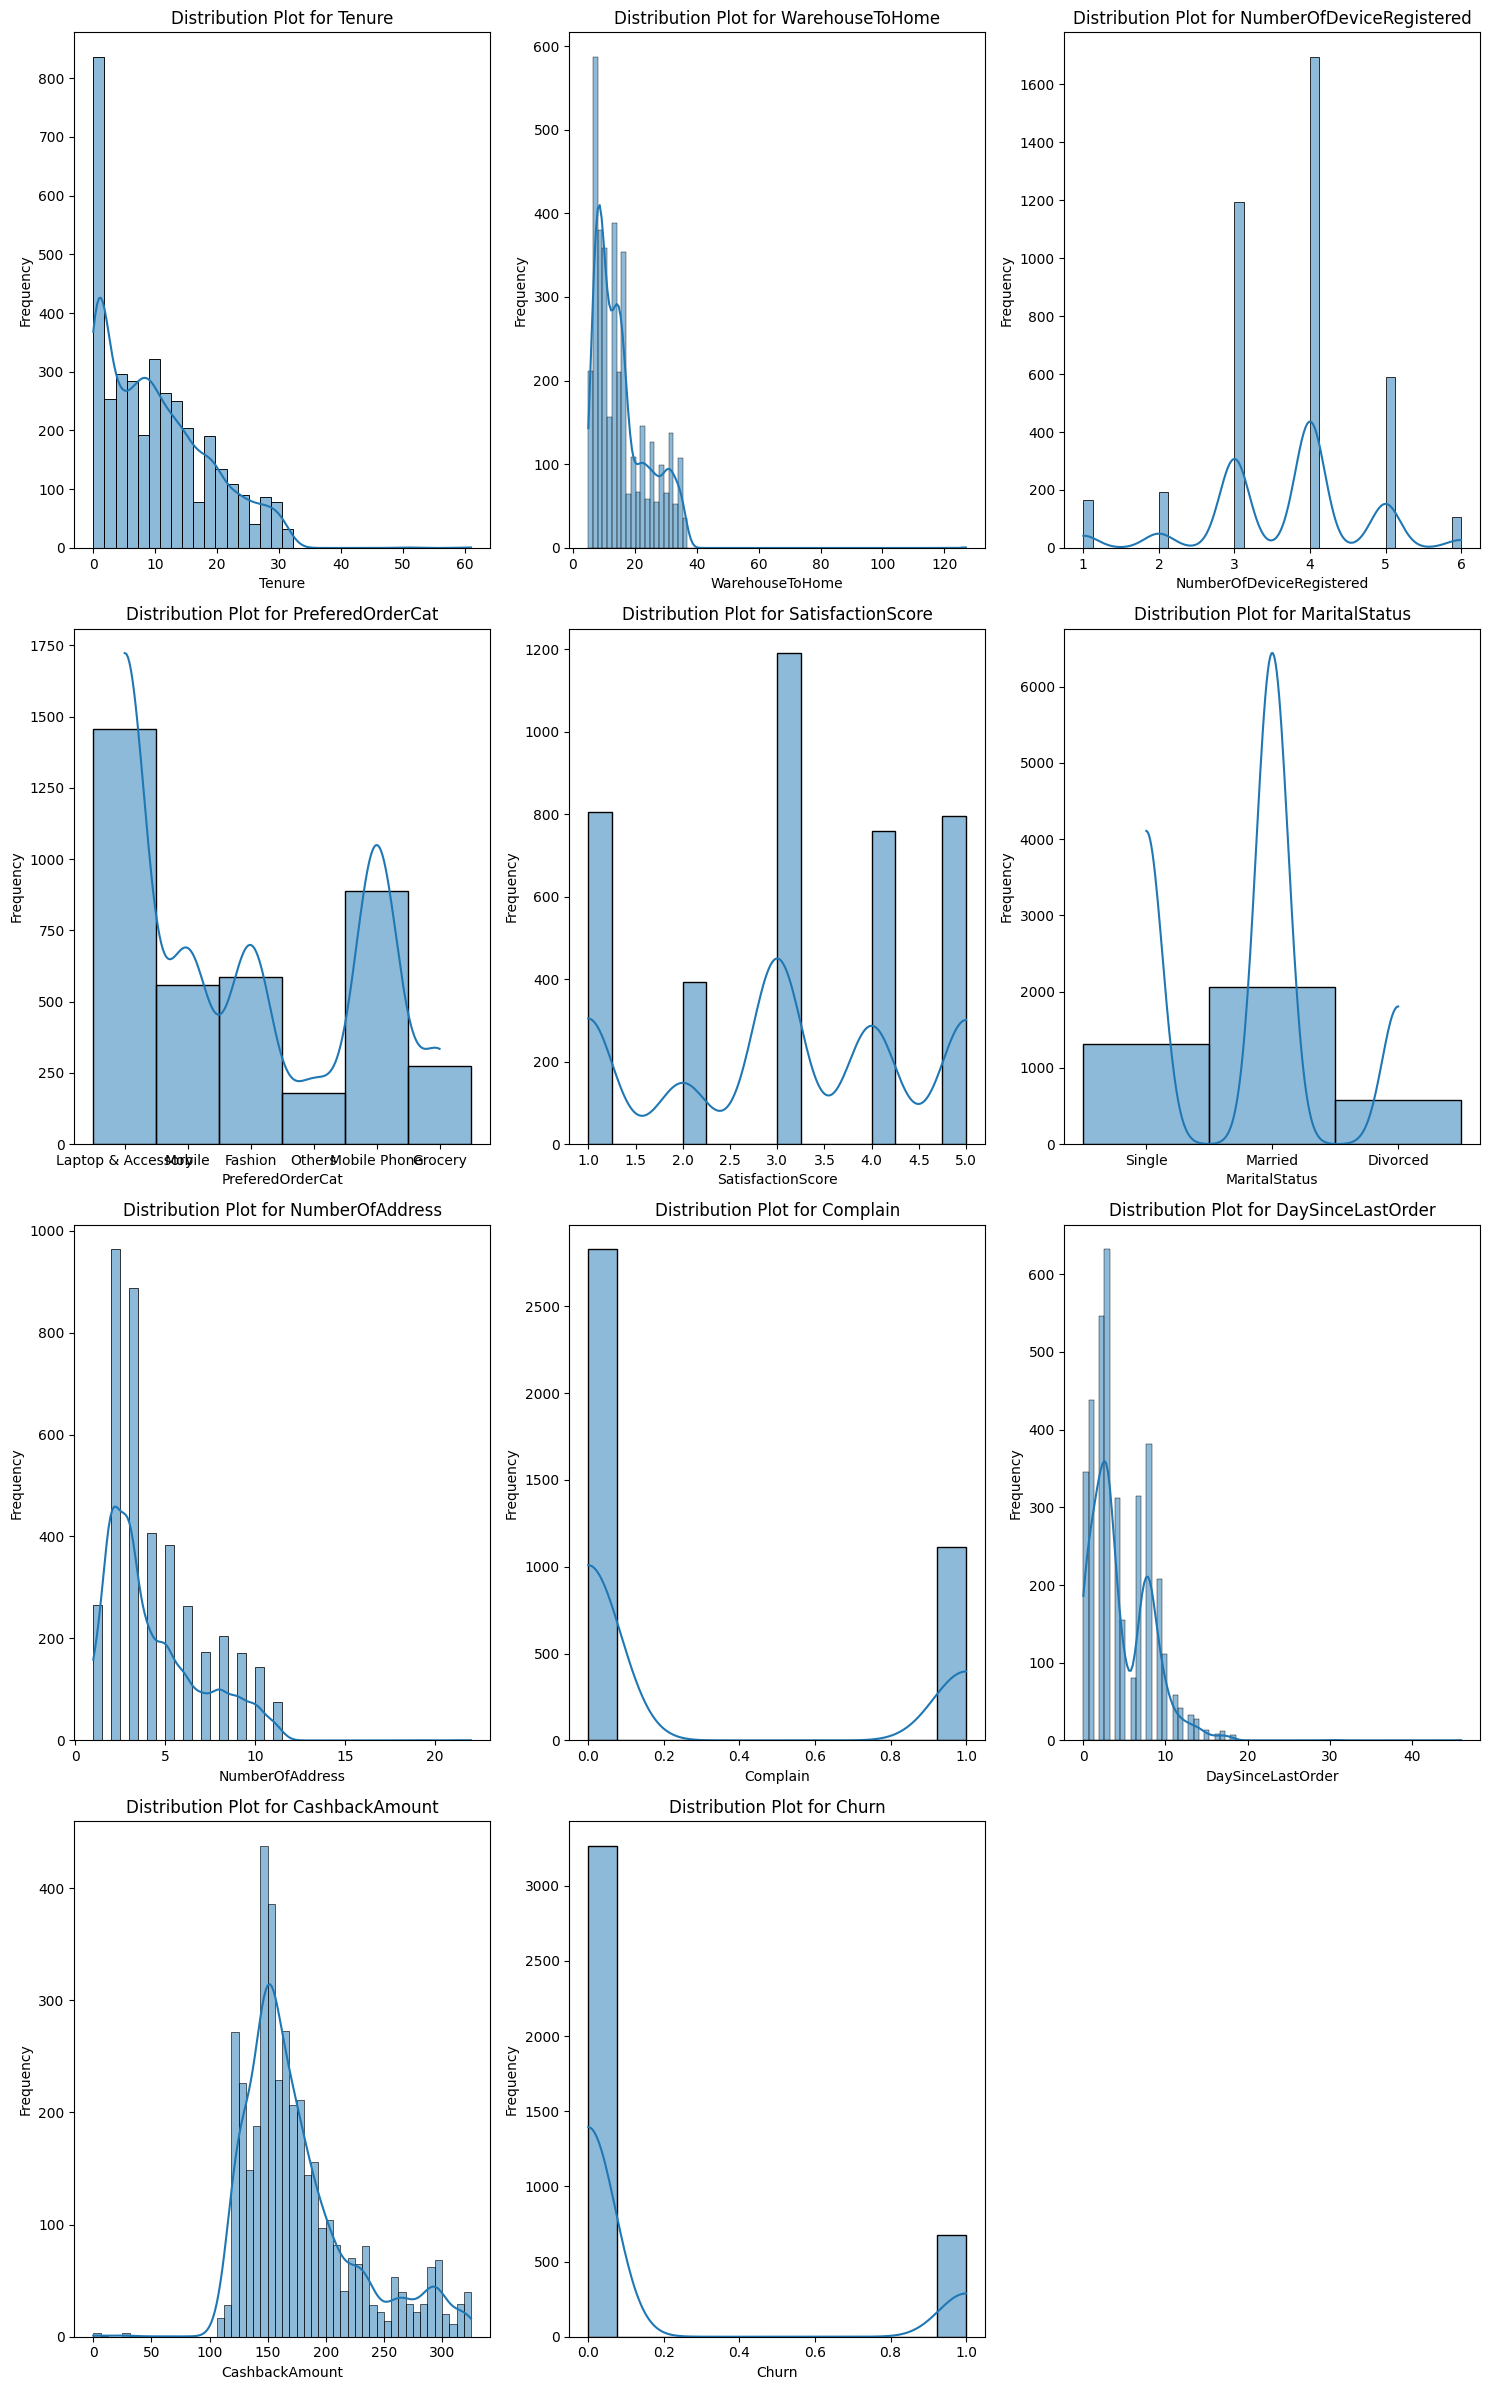

In [560]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the number of rows and columns for the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and a grid of subplots
plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Box Plot

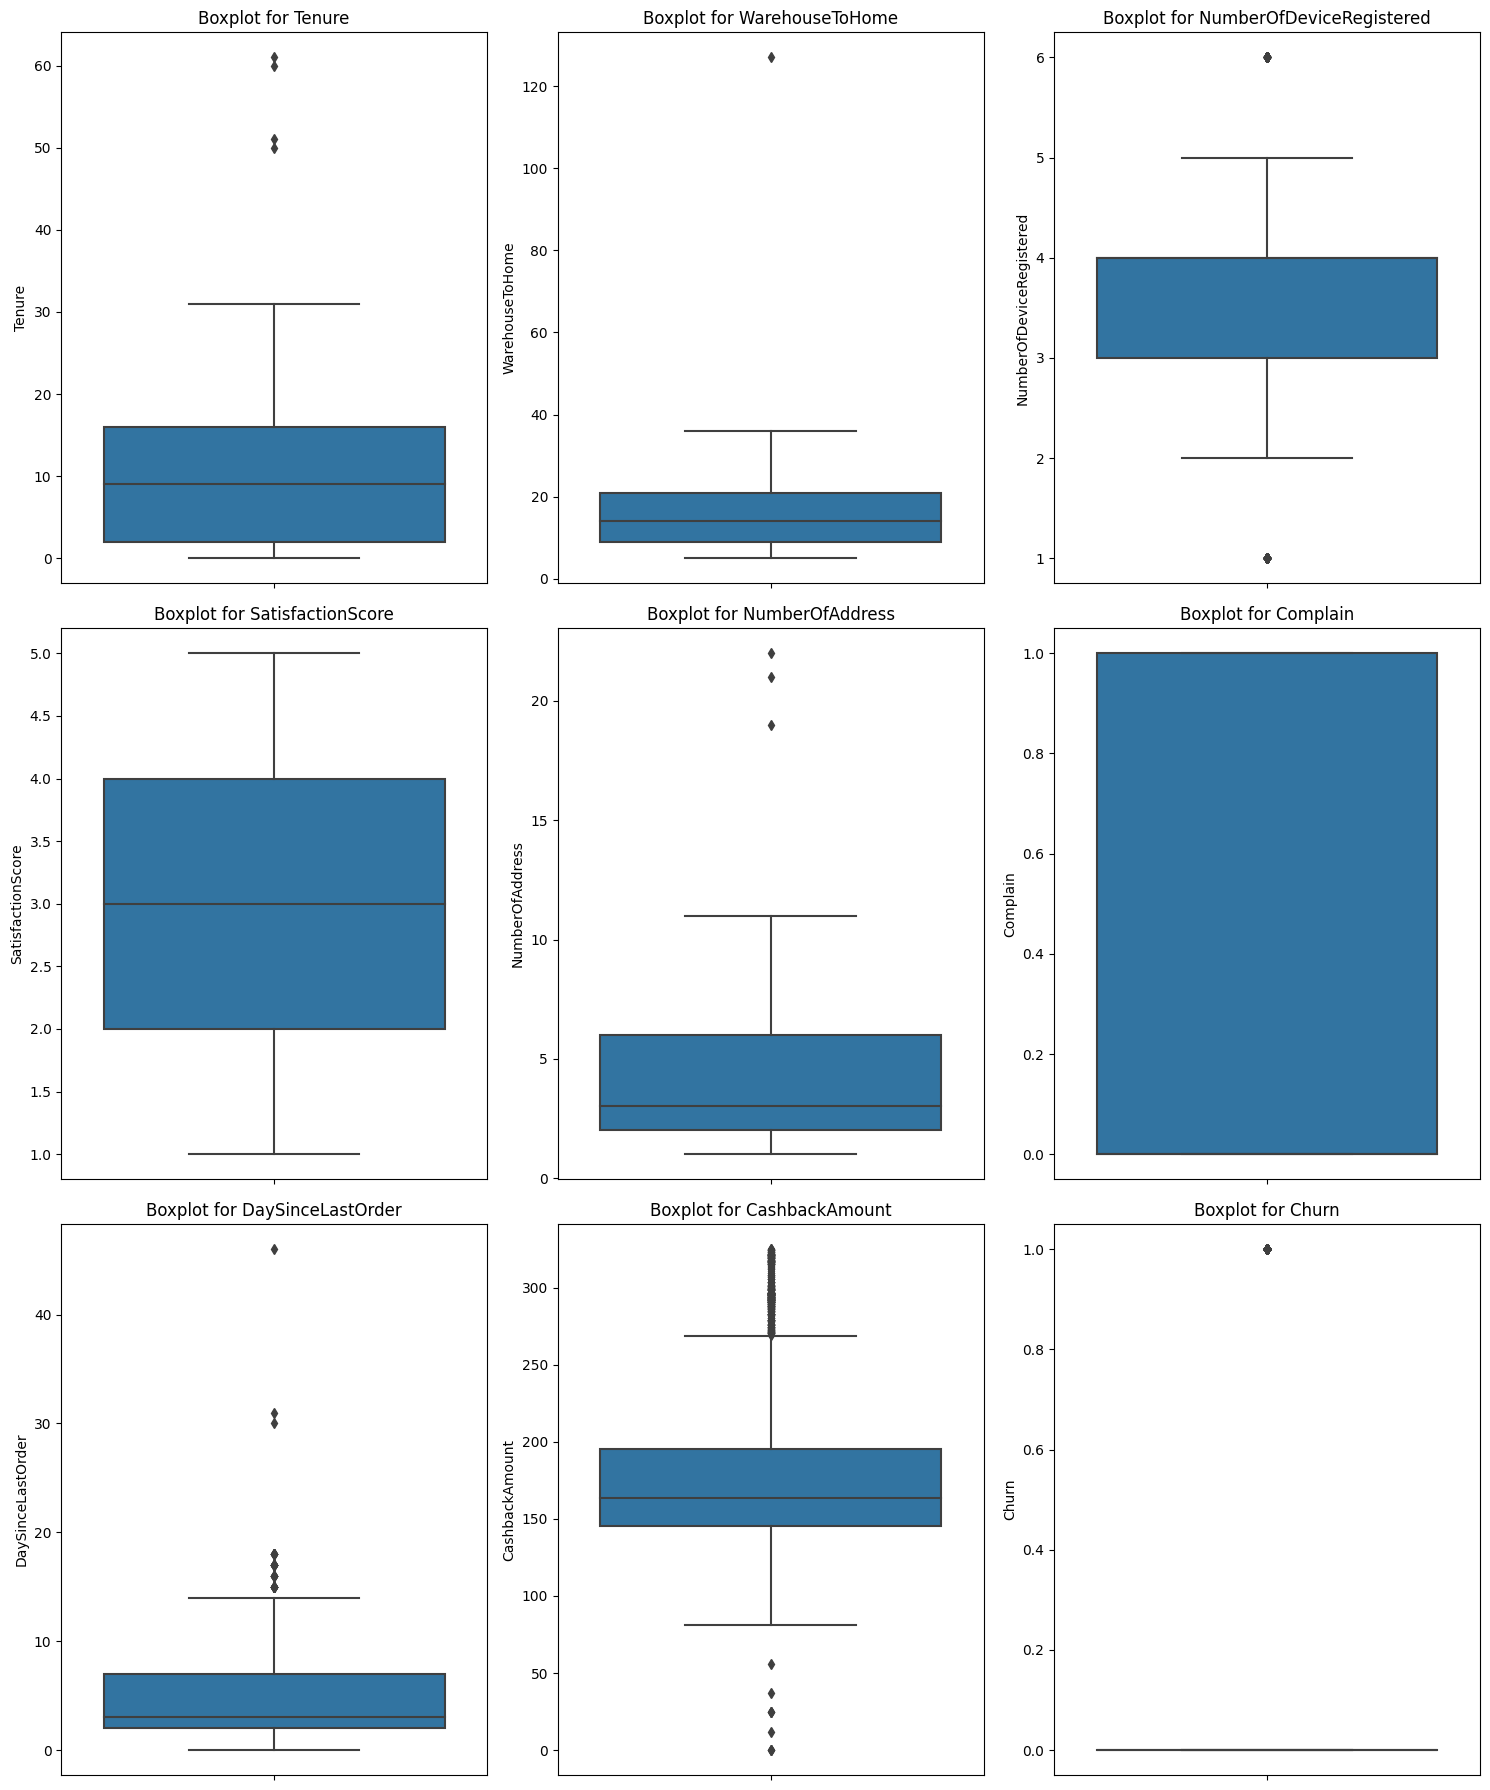

In [561]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and a grid of subplots
plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

## Data Preprocessing

### Splitting Data 
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:388/1*QSXxOderidihfo1itIE7cw.png" width="500" height="300"/>
</div>

* Dilakukan pemisahan data untuk menghindari adanya 'Data Leakage'

In [562]:
print(data['Churn'].value_counts())

Churn
0    3267
1     674
Name: count, dtype: int64


In [593]:
from sklearn.model_selection import train_test_split

# Check the original class distribution
print(data['Churn'].value_counts())

# Attempt to split with a smaller test size if the dataset is small
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Verify the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(y_train.value_counts())

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(y_val.value_counts())

Churn
0    3267
1     674
Name: count, dtype: int64
X_train shape: (3546, 1)
y_train shape: (3546,)
Churn
0    2940
1     606
Name: count, dtype: int64
X_val shape: (395, 1)
y_val shape: (395,)
Churn
0    327
1     68
Name: count, dtype: int64


### Pembersihan Data

#### Mengatasi Data yang Terduplikat

In [565]:
# Sum of repeated / duplicated values in dataframe
X_train.duplicated().sum()

440

In [566]:
# The size of the training set (rows, columns)
X_train.shape

(3152, 10)

In [567]:
# Drop Duplicates
# Store the original indices before dropping duplicates
original_indices = X_train.index

# Drop duplicates
X_train_deduped = X_train.drop_duplicates()

# Identify the indices that were dropped
dropped_duplicates_indices = original_indices.difference(X_train_deduped.index)

# Display the indices of dropped duplicates
print("Indices of dropped duplicates:", dropped_duplicates_indices.tolist())

# Drop the corresponding rows in y_train
y_train = y_train.drop(dropped_duplicates_indices)

# Update X_train to the deduplicated version
X_train = X_train_deduped


Indices of dropped duplicates: [7, 8, 11, 29, 31, 32, 52, 56, 71, 74, 82, 84, 89, 96, 99, 102, 116, 154, 178, 183, 185, 208, 212, 239, 246, 250, 252, 253, 258, 260, 264, 266, 269, 273, 295, 297, 316, 322, 328, 331, 333, 335, 358, 390, 396, 398, 402, 423, 424, 436, 463, 467, 472, 489, 491, 502, 507, 508, 513, 534, 546, 564, 565, 570, 572, 575, 584, 626, 638, 651, 659, 678, 680, 693, 697, 715, 718, 719, 741, 767, 783, 790, 795, 798, 812, 822, 826, 856, 861, 865, 869, 870, 881, 882, 890, 910, 924, 950, 958, 979, 980, 982, 996, 998, 1021, 1023, 1054, 1061, 1068, 1072, 1076, 1084, 1101, 1114, 1115, 1117, 1121, 1127, 1128, 1130, 1143, 1144, 1145, 1165, 1172, 1183, 1187, 1188, 1229, 1237, 1241, 1244, 1247, 1249, 1250, 1257, 1283, 1286, 1298, 1314, 1315, 1319, 1327, 1334, 1339, 1361, 1364, 1385, 1396, 1398, 1399, 1402, 1413, 1421, 1426, 1433, 1443, 1472, 1473, 1485, 1486, 1495, 1499, 1507, 1509, 1514, 1535, 1545, 1556, 1557, 1558, 1566, 1569, 1589, 1593, 1596, 1605, 1611, 1620, 1622, 1623, 162

In [568]:
# The size of the training set after dropping duplicates (rows, columns)
X_train.shape

(2712, 10)

In [569]:
# Sum of missing values in each column
X_train.isnull().sum()

Tenure                      135
WarehouseToHome             112
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           153
CashbackAmount                0
dtype: int64

#### Mengatasi 'Missing Values'
* 'Missing Values' adalah data yang hilang atau tidak terdefinisikan
* Direpresentasikan dengan NaN

In [570]:
# Columns with missing values
columns_to_impute = ['Tenure','WarehouseToHome','DaySinceLastOrder']

# Impute missing values with the median value
X_train[columns_to_impute] = X_train[columns_to_impute].apply(lambda x: x.fillna(x.median()))

# Check if there are any missing values left
X_train.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
dtype: int64

### Mengubah Kolom Kategori (Non-Angka) Menjadi Angka 

#### Opsi 1: Menggunakan Ordinal Encoding

<div align="center">
    <img src="https://www.scaler.com/topics/images/ordinal-encoding-thumbnail.webp" width="400" height="400"/>
</div>

In [571]:
# from sklearn.preprocessing import OrdinalEncoder

# # Define the order for ordinal encoding
# order = ['___', '___', '___']

# # Initialize the OrdinalEncoder with the specified order
# ordinal_encoder = ___(categories=[order])

# X_train['MaritalStatus_encoded'] = ___.fit_transform(X_train[['___']])
# X_val['MaritalStatus_encoded'] = ___.transform(X_val[['___']])

#### Opsi 2: Menggunakan One Hot Encoding

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png" width="1200" height="300"/>
</div>

In [572]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
OH = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')  # sparse_output=False to get a DataFrame

# Fit and transform the data on the training set
train_encoded = OH.fit_transform(X_train[['MaritalStatus']])

# Transform the test set using the encoder fitted on the training data
test_encoded = OH.transform(X_val[['MaritalStatus']])

# Convert the result into DataFrames with appropriate column names
train_encoded = pd.DataFrame(train_encoded, columns=OH.get_feature_names_out(['MaritalStatus']), index=X_train.index)
test_encoded = pd.DataFrame(test_encoded, columns=OH.get_feature_names_out(['MaritalStatus']), index=X_val.index)

# Concatenate the encoded columns with the original DataFrame
X_train = pd.concat([X_train, train_encoded], axis=1)
X_val = pd.concat([X_val, train_encoded], axis=1)


The original gave an error,  because the OneHotEncoder is finding NaN (missing) values in your validation set (X_val) that were not present in your training set (X_train).
Modify the OneHotEncoder: Set handle_unknown='ignore' to allow the encoder to handle previously unseen categories without raising an error.

#### Menggunakan Target Encoder

<div align="center">
    <img src="https://media.licdn.com/dms/image/C5612AQG2g02__iAnCw/article-inline_image-shrink_1000_1488/0/1604114785798?e=1727913600&v=beta&t=_TGIpqLm9MTZqIXWU6aPszhJEbBHLhm6KUbz1AhxgvY" width="700" height="400"/>
</div>

In [573]:
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
target_encoder = TargetEncoder()

# Fit the TargetEncoder to the data
X_train['PreferedOrderCat_encoded'] = target_encoder.fit_transform(X_train['PreferedOrderCat'], y_train)
X_val['PreferedOrderCat_encoded'] = target_encoder.transform(X_val['PreferedOrderCat'])

In [574]:
# Drop the original columns
X_train = X_train.drop(['MaritalStatus', 'PreferedOrderCat'], axis=1)
X_val = X_val.drop(['MaritalStatus', 'PreferedOrderCat'], axis=1)

# Print the first 5 rows of the DataFrame
X_train.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_encoded
2025,0.0,15.0,4,5,4,0,2.0,144.00,0.0,1.0,0.0,0.269168
3440,24.0,8.0,5,4,6,0,2.0,154.82,0.0,1.0,0.0,0.091633
482,9.0,9.0,5,4,4,0,3.0,227.74,0.0,1.0,0.0,0.156716
803,9.0,8.0,3,4,2,0,2.0,122.26,0.0,1.0,0.0,0.277929
3123,4.0,7.0,6,3,5,0,3.0,163.33,1.0,0.0,0.0,0.269168


### Analisis Korelasi Antara Tiap Kolom

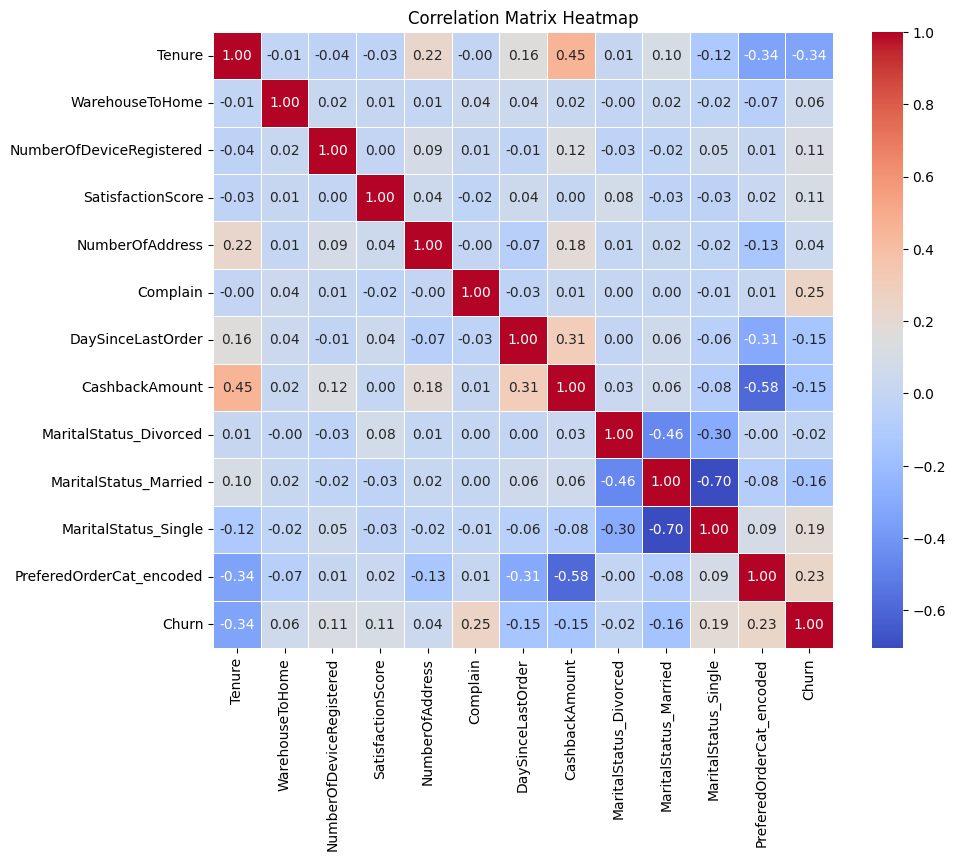

In [575]:
# Compute the correlation matrix
merged = pd.concat([X_train, y_train], axis=1)
correlation_matrix = merged.corr()

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analisis Data 'Outlier'
* Data outlier adalah data yang memiliki nilai abnormal dibandingkan dengan data-data yang lain (seperti terlalu tinggi atau terlalu rendah).
* Jika dibiarkan, model akan rentan untuk menjadi bias karena adanya outlier yang 'menyamarkan' pola sesungguhnya data.  

#### Menghapus Outlier


<div align="center">
    <img src="https://vitalflux.com/wp-content/uploads/2023/05/Outlier-detection-Python-Machine-Learning.png" width="600" height="400"/>
</div>

In [576]:
print(data.columns)

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')


In [577]:
# Assuming you have a dataset named 'data' with features and target columns

# Define the target variable (y) and features (X)
y = data['Churn']  # Replace 'Target' with the name of your target column
X = data.drop(columns=['Tenure','WarehouseToHome', 'NumberOfDeviceRegistered','PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus','NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'])  # Drop the target column to get features

# Split the data into training and validation sets (if not already split)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [578]:
# Store the original indices before dropping outliers
original_indices = X_train.index

# Initialize an empty set to store indices of outliers
outlier_indices = set()

# Loop through each numeric column and identify outliers based on the IQR method
for column in X_train.select_dtypes(include=['number']).columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the indices of outliers
    column_outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)].index
    outlier_indices.update(column_outliers)

# Convert the set of outlier indices to a list
outlier_indices = list(outlier_indices)

# Drop the outliers from X_train and y_train
X_train = X_train.drop(outlier_indices)
y_train = y_train.drop(outlier_indices)

# Display the indices of dropped outliers (if needed)
print("Indices of dropped outliers:", outlier_indices)

Indices of dropped outliers: [2048, 2049, 20, 27, 29, 33, 34, 2084, 2085, 39, 2088, 2091, 2094, 2102, 2104, 63, 64, 65, 70, 2120, 2125, 2128, 82, 2139, 2142, 95, 100, 2150, 2154, 109, 2158, 118, 2175, 128, 2176, 131, 2183, 2185, 138, 139, 142, 2191, 2195, 148, 150, 2199, 2200, 2203, 2207, 173, 174, 2223, 2228, 2230, 2232, 189, 195, 2244, 200, 202, 2251, 2254, 2260, 2264, 2267, 220, 238, 239, 240, 250, 261, 2315, 269, 270, 275, 2327, 286, 2339, 300, 2356, 311, 316, 2366, 2379, 2380, 333, 339, 2394, 350, 2400, 353, 2402, 354, 360, 2410, 363, 362, 2416, 369, 370, 371, 2421, 2427, 379, 390, 2438, 2445, 2453, 2454, 2455, 2459, 418, 419, 422, 2473, 430, 431, 2481, 2485, 2486, 447, 2495, 454, 2505, 461, 2515, 469, 470, 477, 2527, 479, 2529, 2531, 2533, 2544, 497, 505, 507, 2561, 515, 2565, 2566, 2567, 2574, 2581, 539, 2588, 2590, 2592, 2594, 2606, 559, 2609, 2613, 2614, 567, 568, 572, 575, 576, 578, 2630, 2631, 585, 586, 2641, 2642, 596, 2645, 2646, 606, 2662, 2663, 2668, 620, 628, 2678, 2682

In [579]:
X_train.shape

(2617, 1)

#### Mengubah Bentuk Data (Data Transformation)

<div align="center">
    <img src="https://qph.cf2.quoracdn.net/main-qimg-7dfe133226bb8af84e56f35eb5f15010" width="600" height="400"/>
</div>

In [580]:
import numpy as np

# Columns to apply log transformation
columns = ['Churn']

# Apply log transformation, adding 1 to avoid issues with zero values
X_train[columns] = X_train[columns].apply(lambda x: np.log1p(x))
X_val[columns] = X_train[columns].apply(lambda x: np.log1p(x))

# Check the transformed data
print(X_train.head())

      Churn
2684    0.0
1909    0.0
650     0.0
462     0.0
50      0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


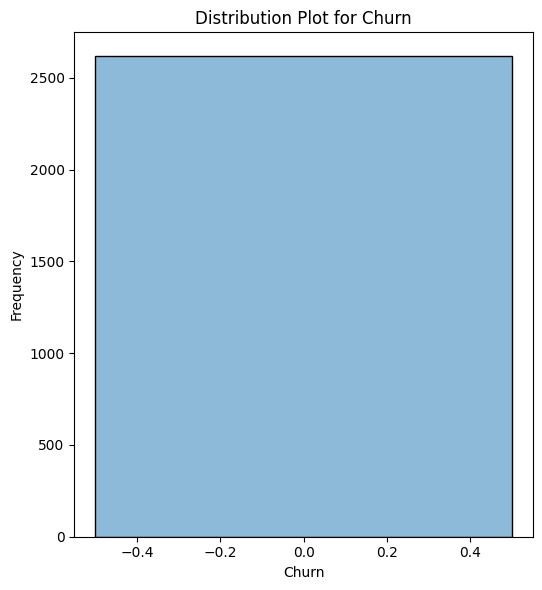

In [581]:
# Calculate the number of rows and columns for the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(X_train.columns) + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and a grid of subplots
plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(X_train.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Tahap Modelling

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/0*ITqseFDgT5ZA8JMl" width="800" height="450"/>
</div>

In [586]:
print(y_train.value_counts())

Churn
0    2617
Name: count, dtype: int64


In [587]:
print(y_val.value_counts())

Series([], Name: count, dtype: int64)


In [588]:
print(X_train.dtypes)

Churn    float64
dtype: object


In [595]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#Nilai kosong di drop pada X_val agar model bisa gunakan untuk 'belajar'
# Drop rows with null values in X_val
null_indices = X_val[X_val.isnull().any(axis=1)].index

# Drop the corresponding rows in both X_val and y_val
X_val_cleaned = X_val.dropna()
y_val_cleaned = y_val.loc[X_val_cleaned.index]

# Update X_val and y_val with the cleaned versions
X_val = X_val_cleaned
y_val = y_val_cleaned

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val_cleaned)

# Calculate accuracy
accuracy = accuracy_score(y_val_cleaned,y_pred )

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_cleaned, y_pred)

# Generate classification report
class_report = classification_report(y_val_cleaned, y_pred)

# Calculate F1 score
f1 = f1_score(y_val_cleaned, y_pred)


# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Confusion Matrix:
[[327   0]
 [  0  68]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00        68

    accuracy                           1.00       395
   macro avg       1.00      1.00      1.00       395
weighted avg       1.00      1.00      1.00       395

F1 Score: 1.00


### Learning Curve

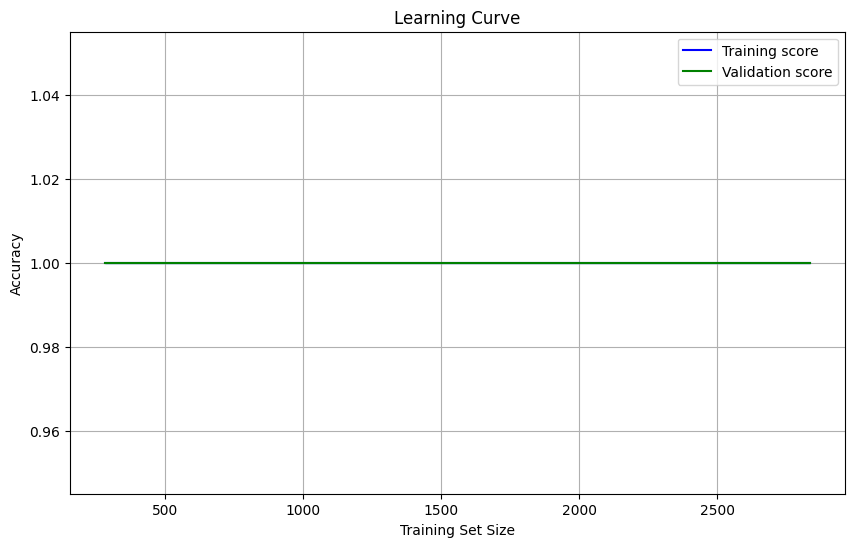

In [596]:
from sklearn.model_selection import learning_curve

# Define the range of training sizes
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate the mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation score', color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


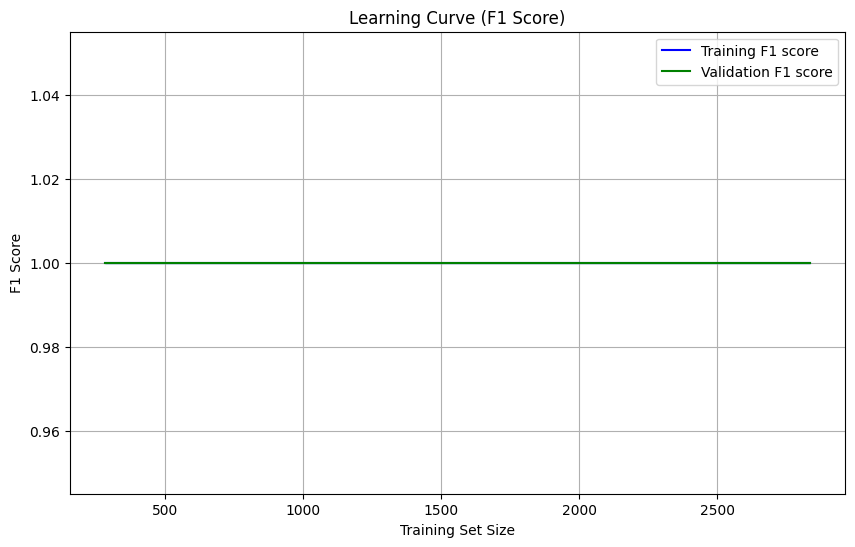

In [597]:
from sklearn.model_selection import learning_curve

# Define the range of training sizes and use F1 score as the evaluation metric
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1', random_state=42
)

# Calculate the mean and standard deviation for training and validation F1 scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve for F1 score
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training F1 score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation F1 score', color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

plt.title('Learning Curve (F1 Score)')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()


## Hal-Hal yang Bisa Kalian Eksplor Lebih Jauh untuk Memperbagus Model:
* Data Preprocessing yang lebih bagus.
* Cross-validation saat modelling.
* Jenis model yang lebih kompleks (XGBoost, Deep Learning, dll).
* Dan masih banyak lagi :)